# Фильтр Блума 
— это вероятностная структура данных для проверки принадлежности элемента множеству. Он использует битовый массив размера m k хеш-функций.


Элемент пропускается через k хеш-функций, получаются индексы в битовом массиве. Биты на этих индексах устанавливаются в 1.

Элемент снова хешируется через те же k функций.

Если все соответствующие биты равны 1, элемент, вероятно, есть в множестве (возможны ложноположительные срабатывания). Если хотя бы один бит равен 0, элемента точно нет.

In [23]:
import mmh3 
import math

class BloomFilter:
    def __init__(self, m, k):
        self.m = m
        self.k = k
        self.bit_array = [False] * m

    def _hash(self, item, seed):
        return mmh3.hash(item, seed) % self.m

    def add(self, item):
        for i in range(self.k):
            index = self._hash(item, i)
            self.bit_array[index] = True

    def contains(self, item):
        for i in range(self.k):
            index = self._hash(item, i)
            if not self.bit_array[index]:
                return False
        return True
    def union(self, other):
        new_filter = BloomFilter(self.m, self.k)
        new_filter.bit_array = [a or b for a, b in zip(self.bit_array, other.bit_array)]
        return new_filter

    def intersection(self, other):
        new_filter = BloomFilter(self.m, self.k)
        new_filter.bit_array = [a and b for a, b in zip(self.bit_array, other.bit_array)]
        return new_filter


In [24]:
n = 3
persent_error = 0.01
m = int(- n * math.log(persent_error)/(math.log(2))**2)
k = int(m * math.log(2)/n)
bloom_filter = BloomFilter(m, k)

elements_to_add = ["1001", "0001", "1011"]
for element in elements_to_add:
    bloom_filter.add(element)

test_elements = ["1111", "0001", "1110", "1011"]
for element in test_elements:
    result = bloom_filter.contains(element)
    print(f"Элемент '{element}' {'вероятно находится в множестве' if result else 'скорее не находится в множестве'}")
print(m)
print(k)



Элемент '1111' скорее не находится в множестве
Элемент '0001' вероятно находится в множестве
Элемент '1110' скорее не находится в множестве
Элемент '1011' вероятно находится в множестве
28
6


In [25]:
def false_positive_probability(m, k, n):
    return (1 - math.exp(-k * n / m)) ** k

In [26]:
import matplotlib.pyplot as plt
from numpy import zeros

m_values = [100, 500, 1000, 5000, 10000]
k_values = [1, 2, 3, 4, 5]
n = 100 

results = zeros((len(m_values), len(k_values)))

for i, m in enumerate(m_values):
    for j, k in enumerate(k_values):
        results[i, j] = round(false_positive_probability(m, k, n), 2)

print("Таблица вероятностей ложноположительных срабатываний:")
print(results)


Таблица вероятностей ложноположительных срабатываний:
[[0.63 0.75 0.86 0.93 0.97]
 [0.18 0.11 0.09 0.09 0.1 ]
 [0.1  0.03 0.02 0.01 0.01]
 [0.02 0.   0.   0.   0.  ]
 [0.01 0.   0.   0.   0.  ]]


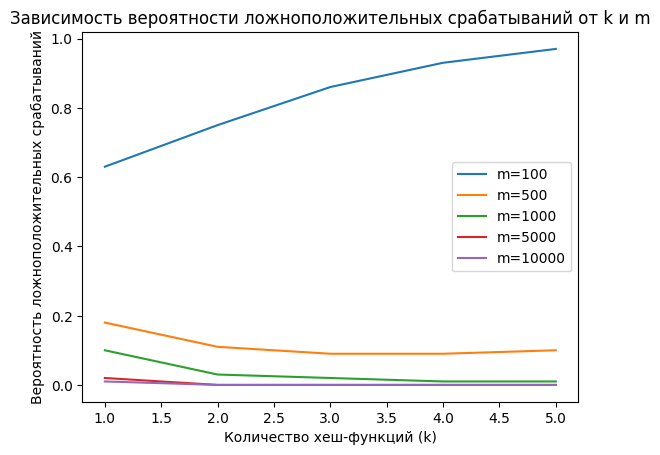

In [27]:
for i, m in enumerate(m_values):
    plt.plot(k_values, results[i, :], label=f'm={m}')

plt.xlabel('Количество хеш-функций (k)')
plt.ylabel('Вероятность ложноположительных срабатываний')
plt.title('Зависимость вероятности ложноположительных срабатываний от k и m')
plt.legend()
plt.show()

In [28]:
bf1 = BloomFilter(100, 3)
bf2 = BloomFilter(100, 3)

bf1.add("1001")
bf1.add("1000")

bf2.add("1000")
bf2.add("1111")

bf_union = bf1.union(bf2)
print("Объединение:", bf_union.contains("1001"))  # Ожидаем True
print("Объединение:", bf_union.contains("1111"))  # Ожидаем True

bf_intersection = bf1.intersection(bf2)
print("Пересечение:", bf_intersection.contains("1000"))  # Ожидаем True
print("Пересечение:", bf_intersection.contains("1111"))  # Ожидаем False

Объединение: True
Объединение: True
Пересечение: True
Пересечение: False
